# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../../data/datasets/wine/winequality-red.csv", sep=";")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

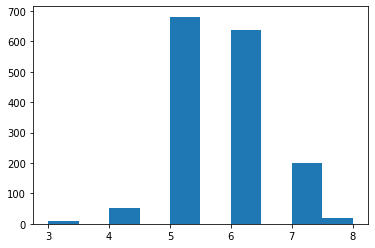

In [9]:
plt.hist(df["quality"])

In [10]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos
(Obtener valores entre 0 y 1)

In [11]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


### Clustering jerárquico con scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [16]:
md = pd.Series(clus.labels_)
md

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

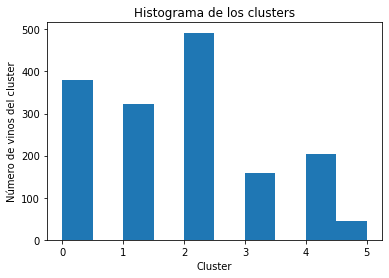

In [17]:
plt.hist(md)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [18]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
Z = linkage(df_norm, "ward")

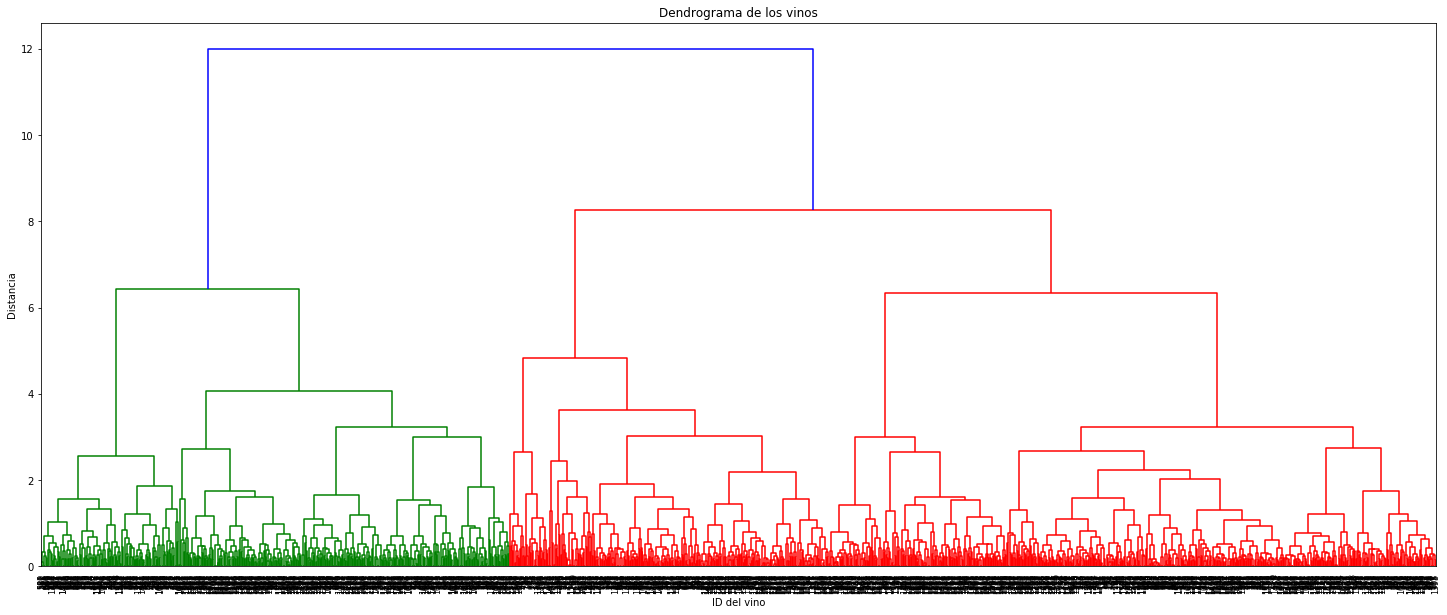

In [22]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

### Clustering con K-means

In [23]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [24]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
model.labels_

array([2, 2, 2, ..., 3, 3, 4])

In [26]:
md_k = pd.Series(model.labels_)

In [27]:
df_norm["clust_h"] = md
df_norm["clust_k"] = md_k

In [28]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([257.,   0.,  29.,   0., 512.,   0., 222.,   0., 257., 322.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

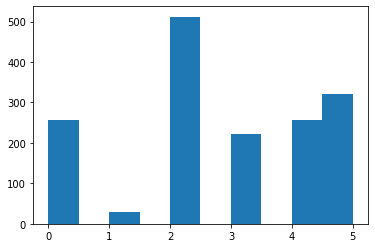

In [29]:
plt.hist(md_k)

In [30]:
model.cluster_centers_

array([[0.57573775, 0.20290763, 0.5044358 , 0.12933746, 0.13067174,
        0.13383022, 0.08979665, 0.65141386, 0.33567205, 0.22491204,
        0.288696  , 0.54708171],
       [0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.26332619, 0.35831148, 0.12091797, 0.09152263, 0.12274364,
        0.14393981, 0.10637975, 0.49018275, 0.48643578, 0.15504538,
        0.22259115, 0.4421875 ],
       [0.17392171, 0.32509564, 0.09112613, 0.09416266, 0.0952338 ,
        0.25161781, 0.12456626, 0.32405644, 0.58054905, 0.18708529,
        0.49073689, 0.61351351],
       [0.36420922, 0.16037258, 0.42568093, 0.10793668, 0.10533119,
        0.16726037, 0.08554812, 0.40988018, 0.41802751, 0.2365619 ,
        0.49338521, 0.70038911],
       [0.31608311, 0.27769506, 0.30425466, 0.15089764, 0.12695071,
        0.37846645, 0.29607357, 0.53826579, 0.43668998, 0.17854353,
        0.21450868,

In [31]:
model.inertia_

186.57470700702802

### Interpretación final

In [32]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.575738,0.202908,0.504436,0.129337,0.130672,0.133830,0.089797,0.651414,0.335672,0.224912,0.288696,0.547082,1.984436
1,0.329875,0.284128,0.487586,0.074162,0.549537,0.213696,0.211405,0.512406,0.234863,0.592814,0.161273,0.468966,4.896552
2,0.263326,0.358311,0.120918,0.091523,0.122744,0.143940,0.106380,0.490183,0.486436,0.155045,0.222591,0.442188,2.011719
3,0.173922,0.325096,0.091126,0.094163,0.095234,0.251618,0.124566,0.324056,0.580549,0.187085,0.490737,0.613514,3.459459
4,0.364209,0.160373,0.425681,0.107937,0.105331,0.167260,0.085548,0.409880,0.418028,0.236562,0.493385,0.700389,0.108949
5,0.316083,0.277695,0.304255,0.150898,0.126951,0.378466,0.296074,0.538266,0.436690,0.178544,0.214509,0.454037,1.049689
